In [33]:
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt

Ile będzie wynosiła orientacyjna cena mieszkania za 5 lat?

In [74]:
flat_price = 120000

In [4]:
flat_price_incr_rate_per_annum = 0.05

In [35]:
number_of_years = 5

In [36]:
flat_price_in_5_years = round(flat_price * (1+flat_price_incr_rate_per_annum) ** number_of_years)
flat_price_in_5_years

153154

In [75]:
print(f'Cena mieszkania po {number_of_years} latach - {flat_price_in_5_years} PLN')

Cena mieszkania po 5 latach - 153154 PLN


In [44]:
freq = 12
rate = 0.12
years = number_of_years
pv = flat_price_in_5_years

In [45]:
rate /= freq  # konwersja stopy do okresu miesięcznego
nper = years * freq  # liczba wszystkich okresów

In [68]:
pmt = -round(npf.pmt(rate, nper, 0, fv=flat_price_in_5_years, when='end')) # round(npf.pmt(rate, nper, flat_price_in_5_years, when='end'))
print(f'Stała wplata przez {number_of_years} lat - {pmt} PLN')

Stała wplata przez 5 lat - 1875 PLN


In [83]:
periods = np.arange(1,nper+1,dtype=int)
periods

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60])

In [84]:
x2 = periods

In [85]:
y2 = []
savings=0
payment = pmt

for i in range(nper):
    savings = savings * (1+rate) + payment
    y2.append(savings)

In [86]:
flat_price_sequence = []
initial_price= flat_price
next_price = initial_price
for i in range(number_of_years+1):
    flat_price_sequence.append(round(next_price))
    next_price = next_price * (1 + flat_price_incr_rate_per_annum )
x=[0,60]
y = [flat_price_sequence[0],flat_price_sequence[-1]]

Text(0, 0.5, 'Skumulowana wartość lokaty')

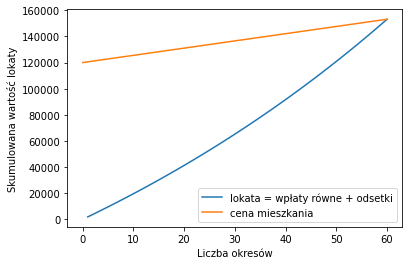

In [82]:
#plt.plot(payments,label='wpłaty równe')
plt.plot(x2, y2,label="lokata = wpłaty równe + odsetki")
plt.plot(x, y,label="cena mieszkania")
#plt.plot(np.array(flat_price_sequence),label="cena mieszkania")
plt.legend()
plt.xlabel('Liczba okresów')
plt.ylabel('Skumulowana wartość lokaty')